In [1]:
#Load Libraries
library(data.table)
library(ggplot2)
library(ggmosaic)
library(readr)
library(stringr)

In [2]:
#load data
filePath <- "../Documents/"
customerData <- fread(paste0(filePath, "QVI_purchase_behaviour.csv"))
library(readxl)
transactionData = read_excel("../desktop/QVI_transaction_data.xlsx")
setDT(transactionData)


### Exploratory Data Analysis

In [3]:
##Examining transaction data
head(transactionData)


DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1


In [4]:
#checking the structure of each column
str(transactionData)

Classes 'data.table' and 'data.frame':	264836 obs. of  8 variables:
 $ DATE          : num  43390 43599 43605 43329 43330 ...
 $ STORE_NBR     : num  1 1 1 2 2 4 4 4 5 7 ...
 $ LYLTY_CARD_NBR: num  1000 1307 1343 2373 2426 ...
 $ TXN_ID        : num  1 348 383 974 1038 ...
 $ PROD_NBR      : num  5 66 61 69 108 57 16 24 42 52 ...
 $ PROD_NAME     : chr  "Natural Chip        Compny SeaSalt175g" "CCs Nacho Cheese    175g" "Smiths Crinkle Cut  Chips Chicken 170g" "Smiths Chip Thinly  S/Cream&Onion 175g" ...
 $ PROD_QTY      : num  2 3 2 5 3 1 1 1 1 2 ...
 $ TOT_SALES     : num  6 6.3 2.9 15 13.8 5.1 5.7 3.6 3.9 7.2 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [5]:
#change date format from interger to date format
transactionData$DATE <- as.Date(transactionData$DATE, origin = "1899-12-30")


As we are only interested in words that will tell us if the productis chips or not, let’s remove all words with digits and special characters from our set of product words

In [6]:
#examine Product Name
summary(transactionData$PROD_NAME)
unique(transactionData$PROD_NAME)
productWords <- data.table(unlist(strsplit(unique(transactionData$PROD_NAME), " ")))
setnames(productWords, 'words')


   Length     Class      Mode 
   264836 character character 

[1] "Natural Chip        Compny SeaSalt175g"  
  [2] "CCs Nacho Cheese    175g"                
  [3] "Smiths Crinkle Cut  Chips Chicken 170g"  
  [4] "Smiths Chip Thinly  S/Cream&Onion 175g"  
  [5] "Kettle Tortilla ChpsHny&Jlpno Chili 150g"
  [6] "Old El Paso Salsa   Dip Tomato Mild 300g"
  [7] "Smiths Crinkle Chips Salt & Vinegar 330g"
  [8] "Grain Waves         Sweet Chilli 210g"   
  [9] "Doritos Corn Chip Mexican Jalapeno 150g" 
 [10] "Grain Waves Sour    Cream&Chives 210G"   
 [11] "Kettle Sensations   Siracha Lime 150g"   
 [12] "Twisties Cheese     270g"                
 [13] "WW Crinkle Cut      Chicken 175g"        
 [14] "Thins Chips Light&  Tangy 175g"          
 [15] "CCs Original 175g"                       
 [16] "Burger Rings 220g"                       
 [17] "NCC Sour Cream &    Garden Chives 175g"  
 [18] "Doritos Corn Chip Southern Chicken 150g" 
 [19] "Cheezels Cheese Box 125g"                
 [20] "Smiths Crinkle      Original 330g"       
 [21] "Infzns Crn Crnchers Tangy Gcamole 110g"  
 [22] "Kettle Sea Salt     And Vinegar 175g"    
 [23] "Smiths Chip Thinly  Cut Original 175g"   
 [24] "Kettle Original 175g"                    
 [25] "Red Rock Deli Thai  Chilli&Lime 150g"    
 [26] "Pringles Sthrn FriedChicken 134g"        
 [27] "Pringles Sweet&Spcy BBQ 134g"            
 [28] "Red Rock Deli SR    Salsa & Mzzrlla 150g"
 [29] "Thins Chips         Originl saltd 175g"  
 [30] "Red Rock Deli Sp    Salt & Truffle 150G" 
 [31] "Smiths Thinly       Swt Chli&S/Cream175G"
 [32] "Kettle Chilli 175g"                      
 [33] "Doritos Mexicana    170g"                
 [34] "Smiths Crinkle Cut  French OnionDip 150g"
 [35] "Natural ChipCo      Hony Soy Chckn175g"  
 [36] "Dorito Corn Chp     Supreme 380g"        
 [37] "Twisties Chicken270g"                    
 [38] "Smiths Thinly Cut   Roast Chicken 175g"  
 [39] "Smiths Crinkle Cut  Tomato Salsa 150g"   
 [40] "Kettle Mozzarella   Basil & Pesto 175g"  
 [41] "Infuzions Thai SweetChili PotatoMix 110g"
 [42] "Kettle Sensations   Camembert & Fig 150g"
 [43] "Smith Crinkle Cut   Mac N Cheese 150g"   
 [44] "Kettle Honey Soy    Chicken 175g"        
 [45] "Thins Chips Seasonedchicken 175g"        
 [46] "Smiths Crinkle Cut  Salt & Vinegar 170g" 
 [47] "Infuzions BBQ Rib   Prawn Crackers 110g" 
 [48] "GrnWves Plus Btroot & Chilli Jam 180g"   
 [49] "Tyrrells Crisps     Lightly Salted 165g" 
 [50] "Kettle Sweet Chilli And Sour Cream 175g" 
 [51] "Doritos Salsa       Medium 300g"         
 [52] "Kettle 135g Swt Pot Sea Salt"            
 [53] "Pringles SourCream  Onion 134g"          
 [54] "Doritos Corn Chips  Original 170g"       
 [55] "Twisties Cheese     Burger 250g"         
 [56] "Old El Paso Salsa   Dip Chnky Tom Ht300g"
 [57] "Cobs Popd Swt/Chlli &Sr/Cream Chips 110g"
 [58] "Woolworths Mild     Salsa 300g"          
 [59] "Natural Chip Co     Tmato Hrb&Spce 175g" 
 [60] "Smiths Crinkle Cut  Chips Original 170g" 
 [61] "Cobs Popd Sea Salt  Chips 110g"          
 [62] "Smiths Crinkle Cut  Chips Chs&Onion170g" 
 [63] "French Fries Potato Chips 175g"          
 [64] "Old El Paso Salsa   Dip Tomato Med 300g" 
 [65] "Doritos Corn Chips  Cheese Supreme 170g" 
 [66] "Pringles Original   Crisps 134g"         
 [67] "RRD Chilli&         Coconut 150g"        
 [68] "WW Original Corn    Chips 200g"          
 [69] "Thins Potato Chips  Hot & Spicy 175g"    
 [70] "Cobs Popd Sour Crm  &Chives Chips 110g"  
 [71] "Smiths Crnkle Chip  Orgnl Big Bag 380g"  
 [72] "Doritos Corn Chips  Nacho Cheese 170g"   
 [73] "Kettle Sensations   BBQ&Maple 150g"      
 [74] "WW D/Style Chip     Sea Salt 200g"       
 [75] "Pringles Chicken    Salt Crips 134g"     
 [76] "WW Original Stacked Chips 160g"          
 [77] "Smiths Chip Thinly  CutSalt/Vinegr175g"  
 [78] "Cheezels Cheese 330g"                    
 [79] "Tostitos Lightly    Salted 175g"         
 [80] "Thins Chips Salt &  Vinegar 175g"        
 [81] "Smiths Crinkle Cut  Chips Barbecue 170g" 
 [82] "Cheetos Puffs 165g"       

In [8]:
#removing words with digits or special character and sorting
cleaned_words <- productWords[!grepl("[^a-zA-Z]", words)]  
word_count <- cleaned_words[, .N, by = words][order(-N)] 
print(word_count)

         words     N
        <char> <int>
  1:             234
  2:     Chips    21
  3:    Smiths    16
  4:   Crinkle    14
  5:       Cut    14
 ---                
165:       Rst     1
166:      Pork     1
167:     Belly     1
168:        Pc     1
169: Bolognese     1


In [9]:
#summary of the transaction Data
summary(transactionData)

      DATE              STORE_NBR     LYLTY_CARD_NBR        TXN_ID       
 Min.   :2018-07-01   Min.   :  1.0   Min.   :   1000   Min.   :      1  
 1st Qu.:2018-09-30   1st Qu.: 70.0   1st Qu.:  70021   1st Qu.:  67602  
 Median :2018-12-30   Median :130.0   Median : 130358   Median : 135138  
 Mean   :2018-12-30   Mean   :135.1   Mean   : 135550   Mean   : 135158  
 3rd Qu.:2019-03-31   3rd Qu.:203.0   3rd Qu.: 203094   3rd Qu.: 202701  
 Max.   :2019-06-30   Max.   :272.0   Max.   :2373711   Max.   :2415841  
    PROD_NBR       PROD_NAME            PROD_QTY         TOT_SALES      
 Min.   :  1.00   Length:264836      Min.   :  1.000   Min.   :  1.500  
 1st Qu.: 28.00   Class :character   1st Qu.:  2.000   1st Qu.:  5.400  
 Median : 56.00   Mode  :character   Median :  2.000   Median :  7.400  
 Mean   : 56.58                      Mean   :  1.907   Mean   :  7.304  
 3rd Qu.: 85.00                      3rd Qu.:  2.000   3rd Qu.:  9.200  
 Max.   :114.00                      Max.   

In [10]:
#checking for outliers
outliers <- transactionData[transactionData$PROD_QTY == 200, ]


In [11]:
#filtering out customer based on loyalty card number

transactionData <- transactionData[transactionData$LYLTY_CARD_NBR != "customer_number_to_remove", ]


In [12]:
#counting the number of transactions by date
transactionData[, DATE := as.Date(DATE, origin = "1899-12-30")]
transactions_by_day <- transactionData[, .(Count = .N), by = DATE]
head(transactions_by_day)
summary(transactions_by_day)

DATE,Count
<date>,<int>
2018-10-17,732
2019-05-14,758
2019-05-20,755
2018-08-17,711
2018-08-18,737
2019-05-19,779


      DATE                Count      
 Min.   :2018-07-01   Min.   :648.0  
 1st Qu.:2018-09-29   1st Qu.:706.8  
 Median :2018-12-30   Median :724.0  
 Mean   :2018-12-30   Mean   :727.6  
 3rd Qu.:2019-03-31   3rd Qu.:744.2  
 Max.   :2019-06-30   Max.   :939.0  

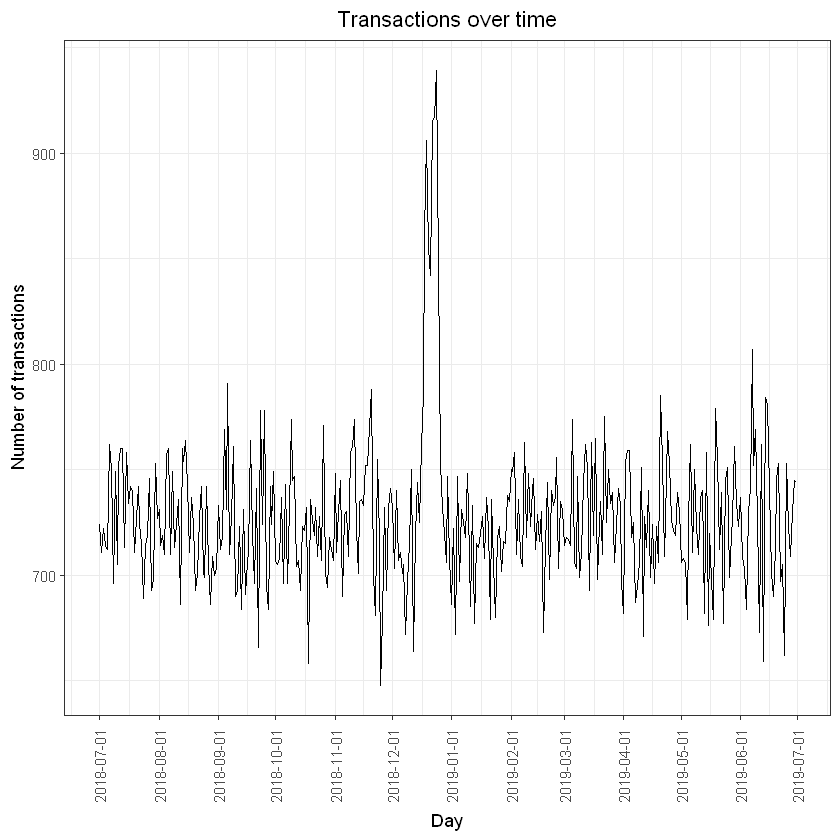

In [13]:
#creating sequence of dates andplotting graph of transaction over time

# #### Setting plot themes to format graphs
theme_set(theme_bw()) 
theme_update(plot.title = element_text(hjust = 0.5))


transactions_by_day <- transactionData[, .N, by = DATE]
ggplot(transactions_by_day, aes(x = DATE, y = N)) +
  geom_line() +
  labs(x = "Day", y = "Number of transactions", title = "Transactions over time") +
  scale_x_date(breaks = "1 month") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5))


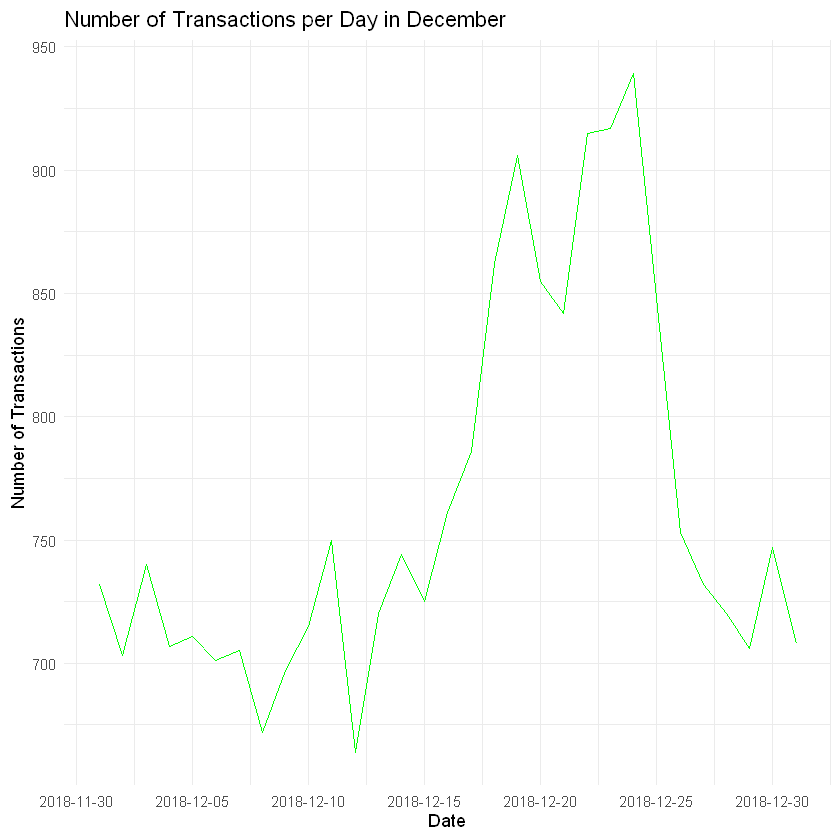

In [14]:
# Filter for December transactions
december_transactions <- transactionData[month(DATE) == 12]


# Calculate number of transactions by day in December
transactions_by_day_dec <- december_transactions[, .(Count = .N), by = DATE]

# Plot the transactions for each day in December
ggplot(transactions_by_day_dec, aes(x = DATE, y = Count)) +
  geom_line(color = "Green") +
  labs(title = "Number of Transactions per Day in December",
       x = "Date",
       y = "Number of Transactions") +
scale_x_date(breaks = "5 day") + 

  theme_minimal()

PACK_SIZE,N
<dbl>,<int>
70,1507
90,3008
110,22387
125,1454
134,25102
135,3257
150,43131
160,2970
165,15297


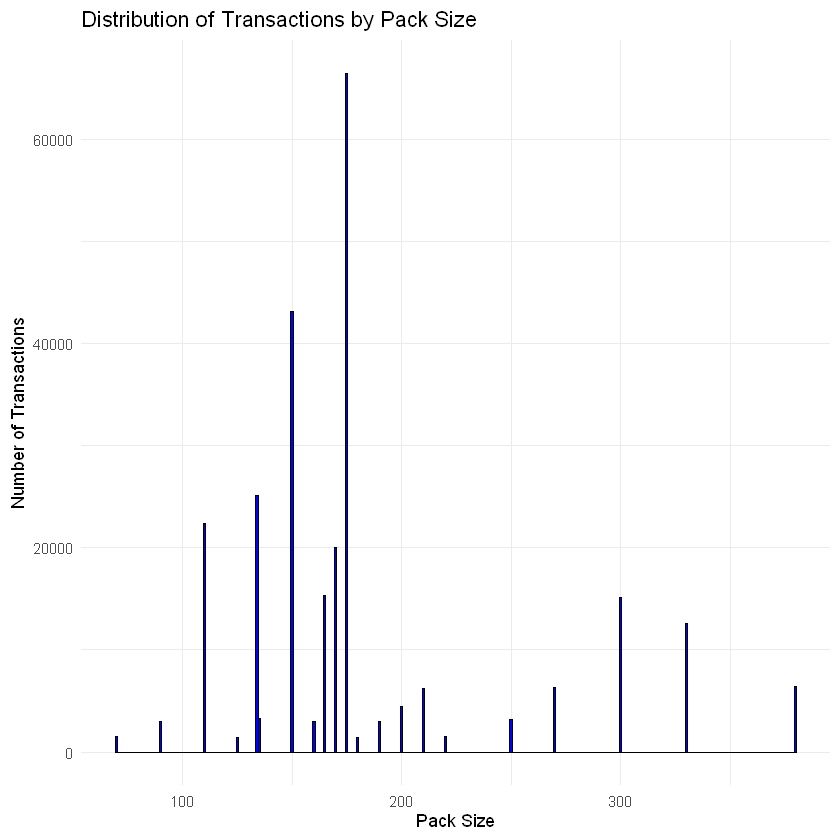

In [15]:
#Branding Features


#Extract pack size
transactionData[, PACK_SIZE := parse_number(PROD_NAME)]
transactionData[, .N, PACK_SIZE][order(PACK_SIZE)]
#The largest size is 380g and the smallest size is 70g

#Histogramof Pack Size
ggplot(transactionData, aes(x = PACK_SIZE)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black") +  
  labs(title = "Distribution of Transactions by Pack Size", 
       x = "Pack Size", 
       y = "Number of Transactions") +
  theme_minimal()


In [16]:
#creating brand name
transactionData[, BRAND := word(PROD_NAME, 1)]

# Check the first few rows to ensure it's created correctly
head(transactionData[, .(PROD_NAME, BRAND)])



PROD_NAME,BRAND
<chr>,<chr>
Natural Chip Compny SeaSalt175g,Natural
CCs Nacho Cheese 175g,CCs
Smiths Crinkle Cut Chips Chicken 170g,Smiths
Smiths Chip Thinly S/Cream&Onion 175g,Smiths
Kettle Tortilla ChpsHny&Jlpno Chili 150g,Kettle
Old El Paso Salsa Dip Tomato Mild 300g,Old


In [17]:
# Combine similar brand names
transactionData[BRAND %in% c("Red", "RRD"), BRAND := "RRD"]
transactionData[BRAND %in% c("Snbts", "Sunbites"), BRAND := "SUNBITES"]
transactionData[BRAND %in% c("Infzns", "Infuzions"), BRAND := "INFUZIONS"]
transactionData[BRAND %in% c("Smith", "Smiths"), BRAND := "SMITHS"]
transactionData[BRAND %in% c("NATURAL", "Natural"), BRAND := "NATURAL"]
transactionData[BRAND %in% c("Dorito", "Doritos"), BRAND := "DORITOS"]
transactionData[BRAND %in% c("Grain", "GrnWves"), BRAND := "GRNWVES"]
transactionData[BRAND %in% c("WOOLWORTHS", "Woolworths","WW"), BRAND := "WOOLWORTHS"]


# Check the unique brand names to ensure they are standardized
unique_brands <- unique(transactionData$BRAND)
print(unique_brands)
transactionData[, .N, by = BRAND][order(BRAND)]


 [1] "NATURAL"    "CCs"        "SMITHS"     "Kettle"     "Old"       
 [6] "GRNWVES"    "DORITOS"    "Twisties"   "WOOLWORTHS" "Thins"     
[11] "Burger"     "NCC"        "Cheezels"   "INFUZIONS"  "RRD"       
[16] "Pringles"   "Tyrrells"   "Cobs"       "French"     "Tostitos"  
[21] "Cheetos"    "SUNBITES"  


BRAND,N
<chr>,<int>
Burger,1564
CCs,4551
Cheetos,2927
Cheezels,4603
Cobs,9693
DORITOS,28147
French,1418
GRNWVES,7740
INFUZIONS,14201


### Examining Customer Data

In [18]:
#Examining customer data
str(customerData)



Classes 'data.table' and 'data.frame':	72637 obs. of  3 variables:
 $ LYLTY_CARD_NBR  : int  1000 1002 1003 1004 1005 1007 1009 1010 1011 1012 ...
 $ LIFESTAGE       : chr  "YOUNG SINGLES/COUPLES" "YOUNG SINGLES/COUPLES" "YOUNG FAMILIES" "OLDER SINGLES/COUPLES" ...
 $ PREMIUM_CUSTOMER: chr  "Premium" "Mainstream" "Budget" "Mainstream" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [19]:
# Summary statistics for numeric columns
summary(customerData)


 LYLTY_CARD_NBR     LIFESTAGE         PREMIUM_CUSTOMER  
 Min.   :   1000   Length:72637       Length:72637      
 1st Qu.:  66202   Class :character   Class :character  
 Median : 134040   Mode  :character   Mode  :character  
 Mean   : 136186                                        
 3rd Qu.: 203375                                        
 Max.   :2373711                                        

Let's a closer look at the LIFESTAGE and PREMIUM_CUSTOMER columns

In [20]:
# Count the number of customers by loyalty card number
customerData[, .N, by = LYLTY_CARD_NBR][order(-N)] 

LYLTY_CARD_NBR,N
<int>,<int>
1000,1
1002,1
1003,1
1004,1
1005,1
1007,1
1009,1
1010,1
1011,1


In [21]:
# Frequency distribution of LIFESTAGE
customerData[, .N, by = LIFESTAGE][order(-N)]

LIFESTAGE,N
<chr>,<int>
RETIREES,14805
OLDER SINGLES/COUPLES,14609
YOUNG SINGLES/COUPLES,14441
OLDER FAMILIES,9780
YOUNG FAMILIES,9178
MIDAGE SINGLES/COUPLES,7275
NEW FAMILIES,2549


In [22]:
# Frequency distribution of PREMIUM_CUSTOMER
customerData[, .N, by = PREMIUM_CUSTOMER][order(-N)]


PREMIUM_CUSTOMER,N
<chr>,<int>
Mainstream,29245
Budget,24470
Premium,18922


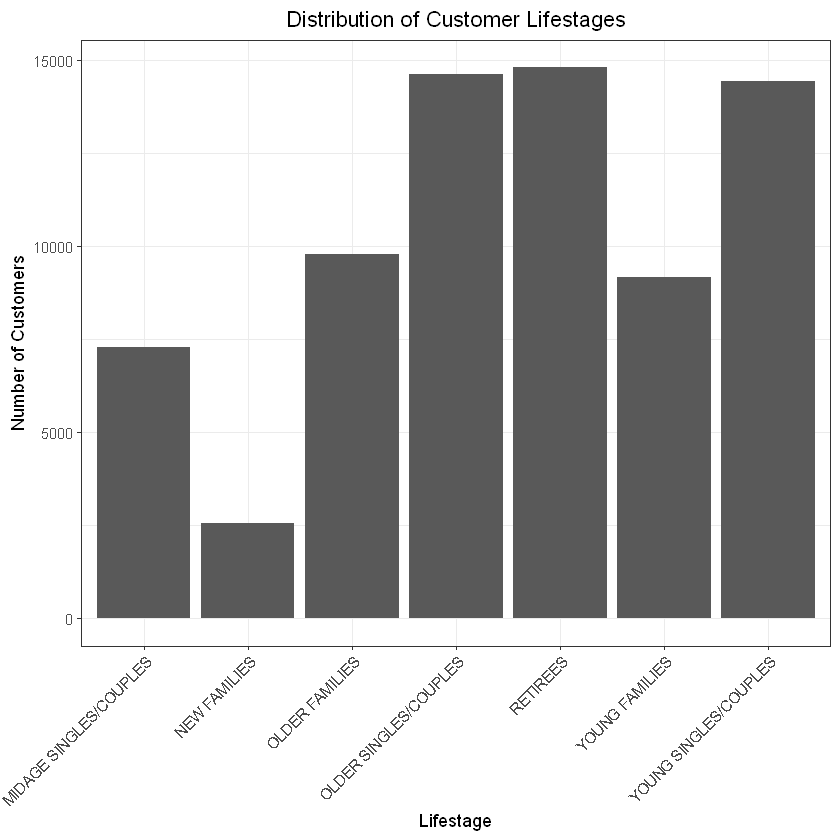

In [23]:
# Bar plot for LIFESTAGE
ggplot(customerData, aes(x = LIFESTAGE)) +
    geom_bar() +
    labs(title = "Distribution of Customer Lifestages", x = "Lifestage", y = "Number of Customers") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))



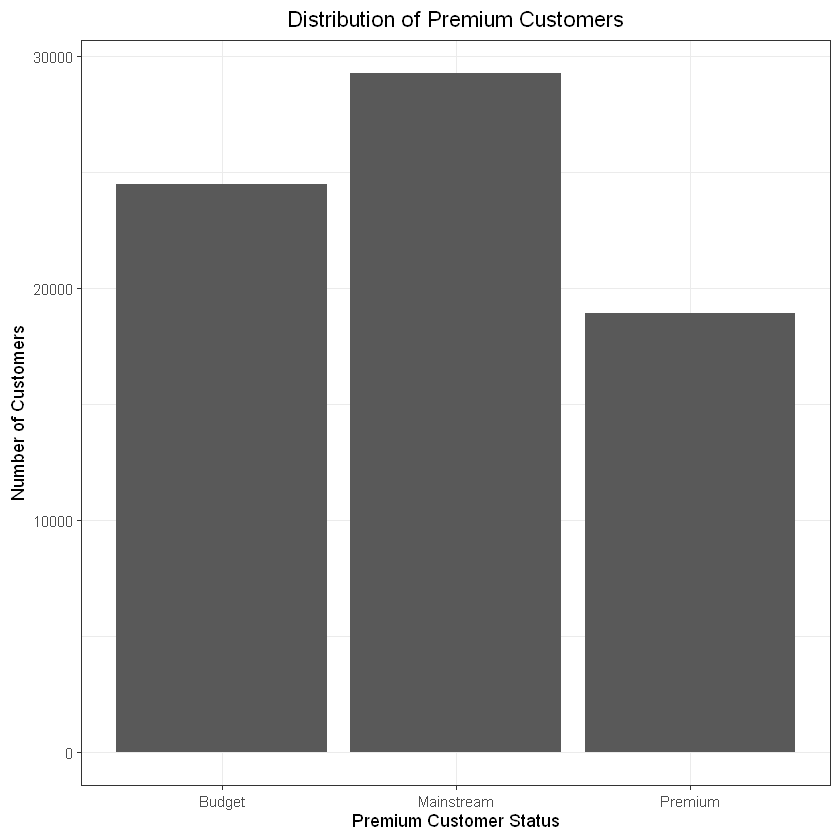

In [24]:
# Bar plot for PREMIUM_CUSTOMER
ggplot(customerData, aes(x = PREMIUM_CUSTOMER)) +
    geom_bar() +
    labs(title = "Distribution of Premium Customers", x = "Premium Customer Status", y = "Number of Customers")


In [25]:
# Check for missing values in each column
missing_values <- sapply(customerData, function(x) sum(is.na(x)))
print(missing_values)

  LYLTY_CARD_NBR        LIFESTAGE PREMIUM_CUSTOMER 
               0                0                0 


In [26]:
# Cross-tabulation of LIFESTAGE and PREMIUM_CUSTOMER
table(customerData$LIFESTAGE, customerData$PREMIUM_CUSTOMER)



                        
                         Budget Mainstream Premium
  MIDAGE SINGLES/COUPLES   1504       3340    2431
  NEW FAMILIES             1112        849     588
  OLDER FAMILIES           4675       2831    2274
  OLDER SINGLES/COUPLES    4929       4930    4750
  RETIREES                 4454       6479    3872
  YOUNG FAMILIES           4017       2728    2433
  YOUNG SINGLES/COUPLES    3779       8088    2574

In [27]:
#merging transaction data to customer data
merged_data <- merge(transactionData, customerData, all.x = TRUE)


In [29]:
# Check for missing customer details
missing_customers <- merged_data[is.na(LIFESTAGE) | is.na(PREMIUM_CUSTOMER), ]



In [30]:
# View the first few rows of missing customers
head(missing_customers)



LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
<int>,<date>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>


In [31]:
# Summary of missing values for each relevant column
missing_summary <- data.table(
  LIFESTAGE_Missing = sum(is.na(merged_data$LIFESTAGE)),
  PREMIUM_CUSTOMER_Missing = sum(is.na(merged_data$PREMIUM_CUSTOMER)),
  CUSTOMER_ID_Missing = sum(is.na(merged_data$CUSTOMER_ID)) 
)

# Print the summary
print(missing_summary)



   LIFESTAGE_Missing PREMIUM_CUSTOMER_Missing CUSTOMER_ID_Missing
               <int>                    <int>               <int>
1:                 0                        0                   0


Great,there are no nulls! 


<br>
So all our customers in the transaction data has been accounted for in the customer dataset. 

In [32]:
# Save the merged dataset as a CSV file
fwrite(merged_data, paste0("../desktop/QVI_data.csv"))

### Data Analysis on Customer Segments
Now that the data is ready for analysis, we can define some metrics of interest to the client:  <br> 
• Who spends  the most on chips(totalsales), describing customers by lifestage and how premium their general purchasing behaviour is? <br> 
• How many customers are in each segment?  <br> 
• How many chips are bought per customer by segment?  <br> 
• What’s the average chip price by customer segment?  <br> 



In [33]:

# Calculate total sales by LIFESTAGE and PREMIUM_CUSTOMER
total_sales_by_segment <- merged_data[, .(Total_Sales = sum(TOT_SALES, na.rm = TRUE)), 
                                 by = .(LIFESTAGE, PREMIUM_CUSTOMER)]


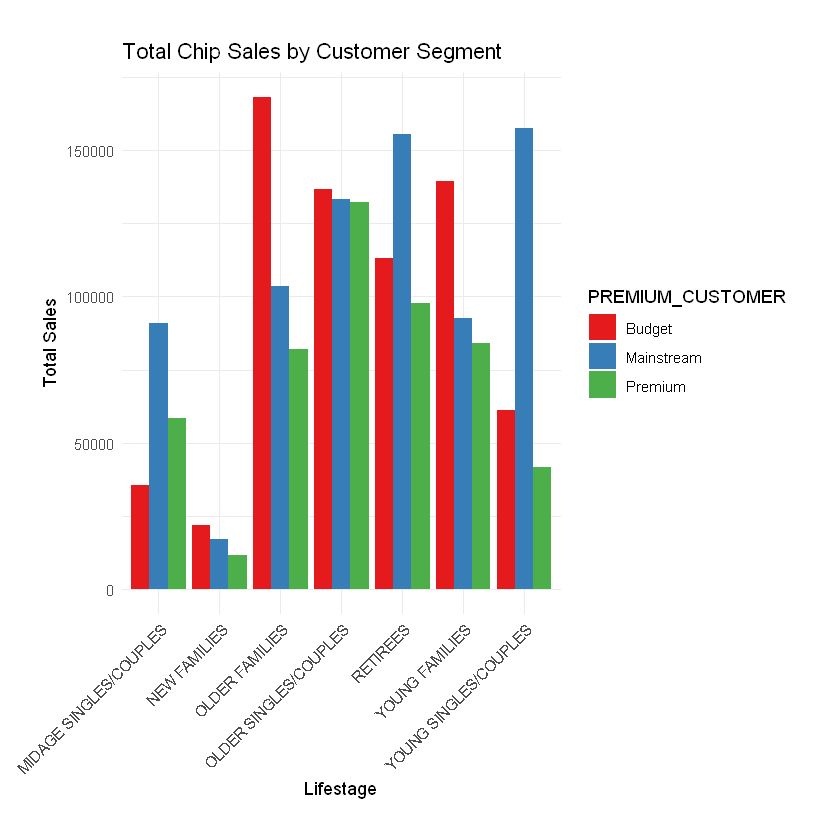

In [34]:
# Create a bar plot
ggplot(total_sales_by_segment, aes(x = LIFESTAGE, y = Total_Sales, fill = PREMIUM_CUSTOMER)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Total Chip Sales by Customer Segment", 
       x = "Lifestage", 
       y = "Total Sales") +
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
scale_fill_brewer(palette = "Set1") +
theme(plot.margin = margin(25, 25, 25, 25)) 


In [35]:
# View the summary table
print(total_sales_by_segment)


                 LIFESTAGE PREMIUM_CUSTOMER Total_Sales
                    <char>           <char>       <num>
 1:  YOUNG SINGLES/COUPLES          Premium    41642.10
 2:  YOUNG SINGLES/COUPLES       Mainstream   157621.60
 3:         YOUNG FAMILIES           Budget   139345.85
 4:  OLDER SINGLES/COUPLES       Mainstream   133393.80
 5: MIDAGE SINGLES/COUPLES       Mainstream    90803.85
 6:  YOUNG SINGLES/COUPLES           Budget    61141.60
 7:           NEW FAMILIES          Premium    11491.10
 8:         OLDER FAMILIES       Mainstream   103445.55
 9:               RETIREES           Budget   113147.80
10:  OLDER SINGLES/COUPLES          Premium   132263.15
11:         OLDER FAMILIES           Budget   168363.25
12: MIDAGE SINGLES/COUPLES          Premium    58432.65
13:         OLDER FAMILIES          Premium    81958.40
14:               RETIREES       Mainstream   155677.05
15:               RETIREES          Premium    97646.05
16:         YOUNG FAMILIES       Mainstream    9

In [36]:
##Summary of Unique Customers
#Calculate the number of unique customers
unique_customers <- merged_data[, .(Unique_Customers = uniqueN(LYLTY_CARD_NBR)), 
                          by = .(LIFESTAGE, PREMIUM_CUSTOMER)]

# View the unique customers summary
print(unique_customers)

                 LIFESTAGE PREMIUM_CUSTOMER Unique_Customers
                    <char>           <char>            <int>
 1:  YOUNG SINGLES/COUPLES          Premium             2574
 2:  YOUNG SINGLES/COUPLES       Mainstream             8088
 3:         YOUNG FAMILIES           Budget             4017
 4:  OLDER SINGLES/COUPLES       Mainstream             4930
 5: MIDAGE SINGLES/COUPLES       Mainstream             3340
 6:  YOUNG SINGLES/COUPLES           Budget             3779
 7:           NEW FAMILIES          Premium              588
 8:         OLDER FAMILIES       Mainstream             2831
 9:               RETIREES           Budget             4454
10:  OLDER SINGLES/COUPLES          Premium             4750
11:         OLDER FAMILIES           Budget             4675
12: MIDAGE SINGLES/COUPLES          Premium             2431
13:         OLDER FAMILIES          Premium             2274
14:               RETIREES       Mainstream             6479
15:               RETIRE

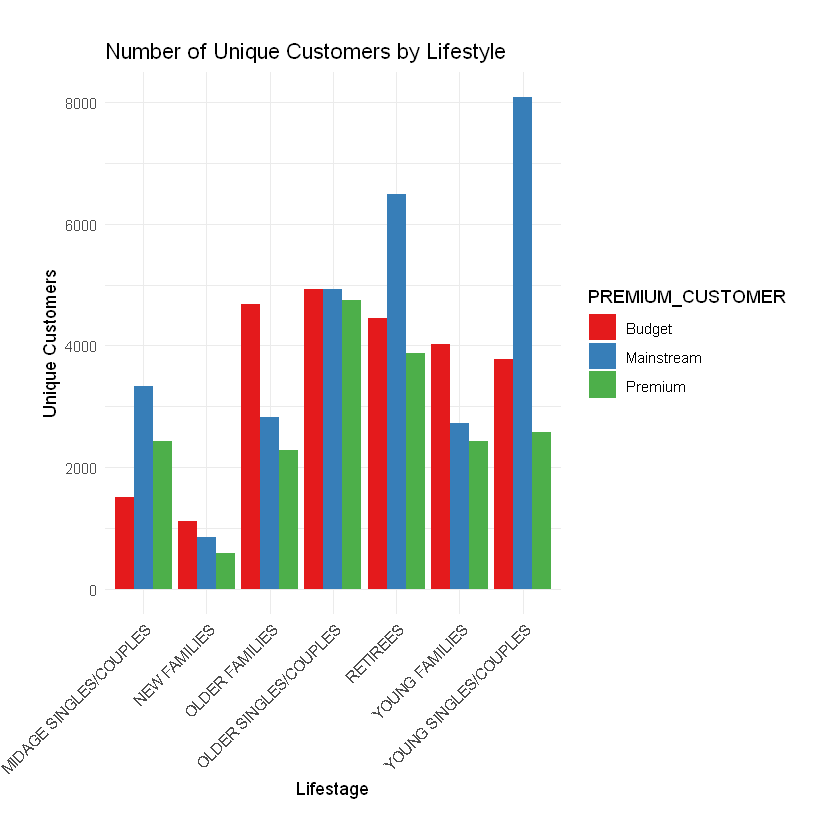

In [37]:
#Create a plot for unique customers
ggplot(unique_customers, aes(x = LIFESTAGE, y = Unique_Customers, fill = PREMIUM_CUSTOMER)) +
  geom_bar(stat = "identity", position = "dodge") + 
  labs(title = "Number of Unique Customers by Lifestyle", 
       x = "Lifestage", 
       y = "Unique Customers") +
  theme_minimal() +
theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
scale_fill_brewer(palette = "Set1") +
theme(plot.margin = margin(25, 25, 25, 25)) 


In [38]:
#Average number of units per customerby LIFESTAGE and PREMIUM_CUSTOMER
#Calculate total units purchased per customer
total_units_per_customer <- merged_data[, .(Total_Units = sum(PROD_QTY)), by = LYLTY_CARD_NBR]

#Merge the total units data with customer segments
total_units_per_customer <- merge(total_units_per_customer, customerData, by = "LYLTY_CARD_NBR", all.x = TRUE)

#Calculate average units per customer by LIFESTAGE and PREMIUM_CUSTOMER
avg_units_per_customer <- total_units_per_customer[, .(Average_Units = mean(Total_Units, na.rm = TRUE)), 
                                                    by = .(LIFESTAGE, PREMIUM_CUSTOMER)]

#View the average units summary
print(avg_units_per_customer)


                 LIFESTAGE PREMIUM_CUSTOMER Average_Units
                    <char>           <char>         <num>
 1:  YOUNG SINGLES/COUPLES          Premium      4.402098
 2:  YOUNG SINGLES/COUPLES       Mainstream      4.776459
 3:         YOUNG FAMILIES           Budget      9.238486
 4:  OLDER SINGLES/COUPLES       Mainstream      7.098783
 5: MIDAGE SINGLES/COUPLES       Mainstream      6.796108
 6:  YOUNG SINGLES/COUPLES           Budget      4.411485
 7:           NEW FAMILIES          Premium      5.028912
 8:         OLDER FAMILIES       Mainstream      9.804309
 9:               RETIREES           Budget      6.458015
10:  OLDER SINGLES/COUPLES          Premium      7.154947
11:         OLDER FAMILIES           Budget      9.639572
12: MIDAGE SINGLES/COUPLES          Premium      6.386672
13:         OLDER FAMILIES          Premium      9.749780
14:               RETIREES       Mainstream      6.253743
15:               RETIREES          Premium      6.426653
16:         YO

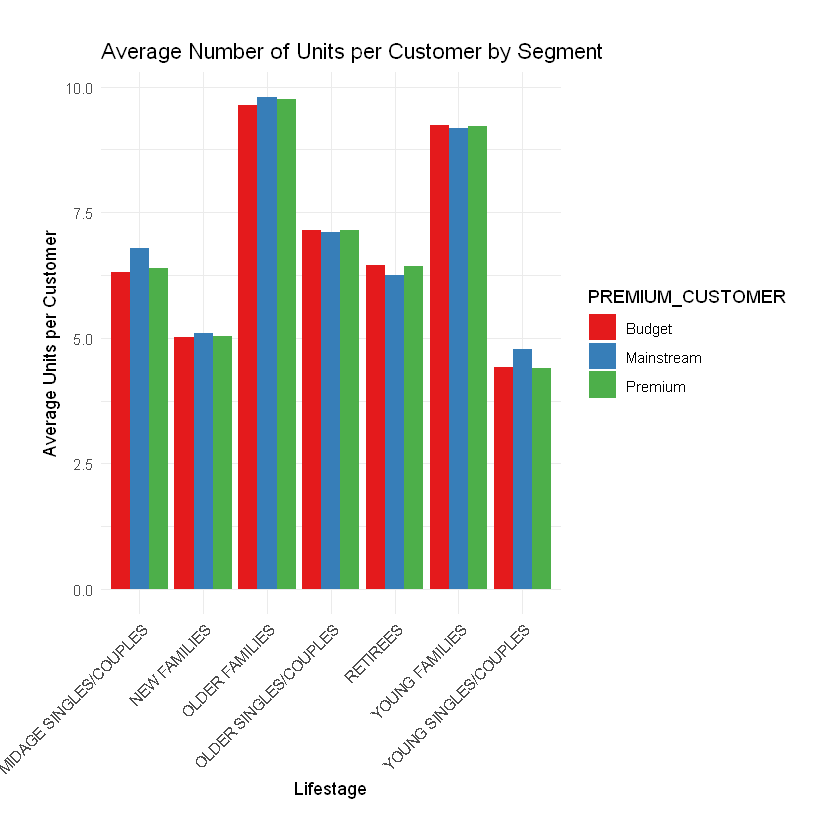

In [39]:
#Create a plot for average units per customer
ggplot(avg_units_per_customer, aes(x = LIFESTAGE, y = Average_Units, fill = PREMIUM_CUSTOMER)) +
  geom_bar(stat = "identity", position = "dodge") +  # Use "stack" for stacked bars if needed
  labs(title = "Average Number of Units per Customer by Segment", 
       x = "Lifestage", 
       y = "Average Units per Customer") +
  theme_minimal() +
 theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
scale_fill_brewer(palette = "Set1") +
theme(plot.margin = margin(25, 25, 25, 25)) 

In [42]:
#Calculating Price Per Unit Sold
#Calculate total sales and total units purchased per customer
total_sales_per_customer <- merged_data[, .(Total_Sales = sum(TOT_SALES)), by = LYLTY_CARD_NBR]
total_units_per_customer <- merged_data[, .(Total_Units = sum(PROD_QTY)), by = LYLTY_CARD_NBR]

#Merge the sales and units data
customer_summary <- merge(total_sales_per_customer, total_units_per_customer, by = "LYLTY_CARD_NBR", all.x = TRUE)

#Calculate average price per unit
customer_summary[, Avg_Price_Per_Unit := Total_Sales / Total_Units]

#Merge with customer data to get segments
customer_summary <- merge(customer_summary, customerData, by = "LYLTY_CARD_NBR", all.x = TRUE)

#Calculate average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
avg_price_per_unit <- customer_summary[, .(Average_Price = mean(Avg_Price_Per_Unit, na.rm = TRUE)), 
                                        by = .(LIFESTAGE, PREMIUM_CUSTOMER)]

# View the average price summary
print(avg_price_per_unit)


                 LIFESTAGE PREMIUM_CUSTOMER Average_Price
                    <char>           <char>         <num>
 1:  YOUNG SINGLES/COUPLES          Premium      3.587880
 2:  YOUNG SINGLES/COUPLES       Mainstream      4.144507
 3:         YOUNG FAMILIES           Budget      3.836333
 4:  OLDER SINGLES/COUPLES       Mainstream      3.811121
 5: MIDAGE SINGLES/COUPLES       Mainstream      4.077885
 6:  YOUNG SINGLES/COUPLES           Budget      3.593321
 7:           NEW FAMILIES          Premium      3.865264
 8:         OLDER FAMILIES       Mainstream      3.810482
 9:               RETIREES           Budget      3.960887
10:  OLDER SINGLES/COUPLES          Premium      3.936156
11:         OLDER FAMILIES           Budget      3.812175
12: MIDAGE SINGLES/COUPLES          Premium      3.763974
13:         OLDER FAMILIES          Premium      3.779584
14:               RETIREES       Mainstream      3.835157
15:               RETIREES          Premium      3.964451
16:         YO

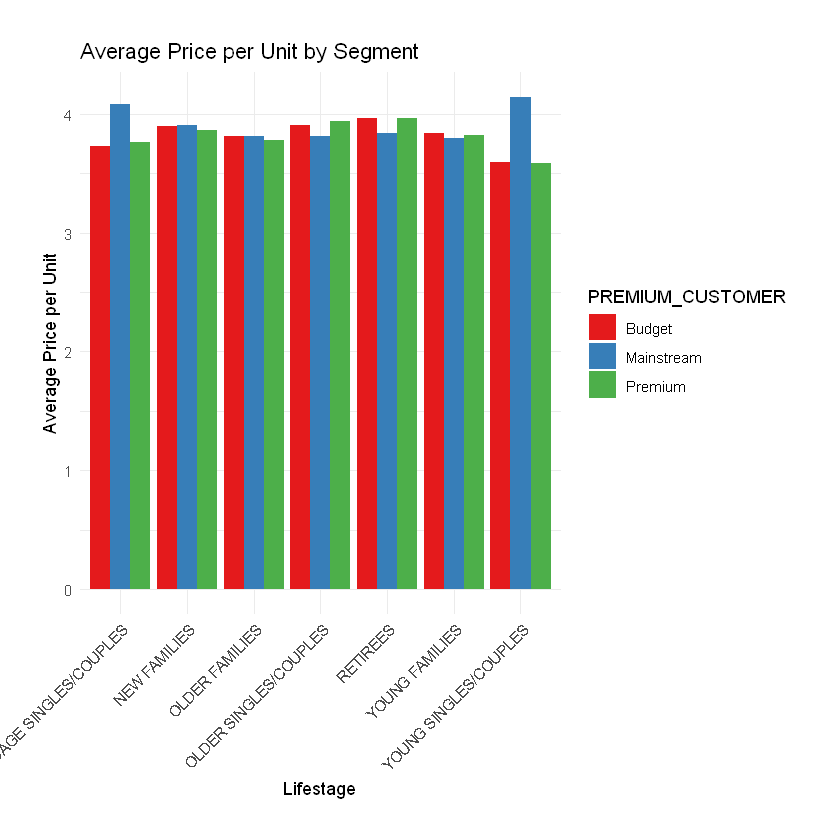

In [41]:
#Create a plot for average price per unit
ggplot(avg_price_per_unit, aes(x = LIFESTAGE, y = Average_Price, fill = PREMIUM_CUSTOMER)) +
  geom_bar(stat = "identity", position = "dodge") +  
  labs(title = "Average Price per Unit by Segment", 
       x = "Lifestage", 
       y = "Average Price per Unit") +
theme_minimal() +
theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
scale_fill_brewer(palette = "Set1") +
theme(plot.margin = margin(25, 25, 25, 25)) 

Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. 

This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips,this is mainly for entertainment purposes rather than their own consumption. This is also supported by there being  fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

As the difference in average price per unit isn’t large, we can check if this difference is statistically different

In [43]:
#### Perform an independent t‐test between mainstream vs premium and budget midage and young singles and couples
pricePerUnit <- merged_data[, price := TOT_SALES/PROD_QTY] 
t.test( merged_data[LIFESTAGE %in% c("YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES") 
            & PREMIUM_CUSTOMER == "Mainstream", price]
               ,  merged_data[LIFESTAGE %in% c("YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES")
            & PREMIUM_CUSTOMER != "Mainstream", price]
                , alternative = "greater")



	Welch Two Sample t-test

data:  merged_data[LIFESTAGE %in% c("YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES") & PREMIUM_CUSTOMER == "Mainstream", price] and merged_data[LIFESTAGE %in% c("YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES") & PREMIUM_CUSTOMER != "Mainstream", price]
t = 40.61, df = 58792, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.3429435       Inf
sample estimates:
mean of x mean of y 
 4.045586  3.688165 


The t-test results in a p-value < 2.2e-16, i.e. the unit price for mainstream, young and mid-age singles and couples are significantly higher than that of budget or premium, young and midage singles and couples. This significant p-value confirms that the observed difference in unit price between these groups is statistically meaningful.

## Deep dive into specific customer segments for insights
We have found quite a few interesting insights that we can dive deeper into.
We might want to target customer segments that contribute the most to sales to retain them or further increasesales. Let’s look at Mainstream-young singles/couples.
For instance,let’s find out if they tend to buy a particular brand of chips.


In [46]:
#### Deep dive into Mainstream, young singles/couples
segment1 <- merged_data[LIFESTAGE == "YOUNG SINGLES/COUPLES" & PREMIUM_CUSTOMER == "Mainstream",]
other <- merged_data[!(LIFESTAGE == "YOUNG SINGLES/COUPLES" & PREMIUM_CUSTOMER == "Mainstream"),]

#### Brand affinity compared to the rest of the population 
quantity_segment1 <- segment1[, sum(PROD_QTY)]
quantity_other <- other[, sum(PROD_QTY)]

quantity_segment1_by_brand <- segment1[, .(targetSegment = sum(PROD_QTY)/quantity_segment1), by = BRAND]
quantity_other_by_brand <-  other[, .(other = sum(PROD_QTY)/quantity_other), by = BRAND]
brand_proportions <- merge(quantity_segment1_by_brand, quantity_other_by_brand)[, affinityToBrand := targetSegment/other]
brand_proportions[order(affinityToBrand)]


BRAND,targetSegment,other,affinityToBrand
<chr>,<dbl>,<dbl>,<dbl>
Burger,0.002743839,0.006139441,0.4469201
WOOLWORTHS,0.028189066,0.057379333,0.4912756
SUNBITES,0.005953614,0.011708668,0.5084791
CCs,0.010483537,0.017586582,0.5961100
NCC,0.003416856,0.005466332,0.6250730
NATURAL,0.014961690,0.023250131,0.6435099
RRD,0.045376890,0.068367732,0.6637179
Cheetos,0.007532615,0.011230632,0.6707205
French,0.003701595,0.005359149,0.6907057


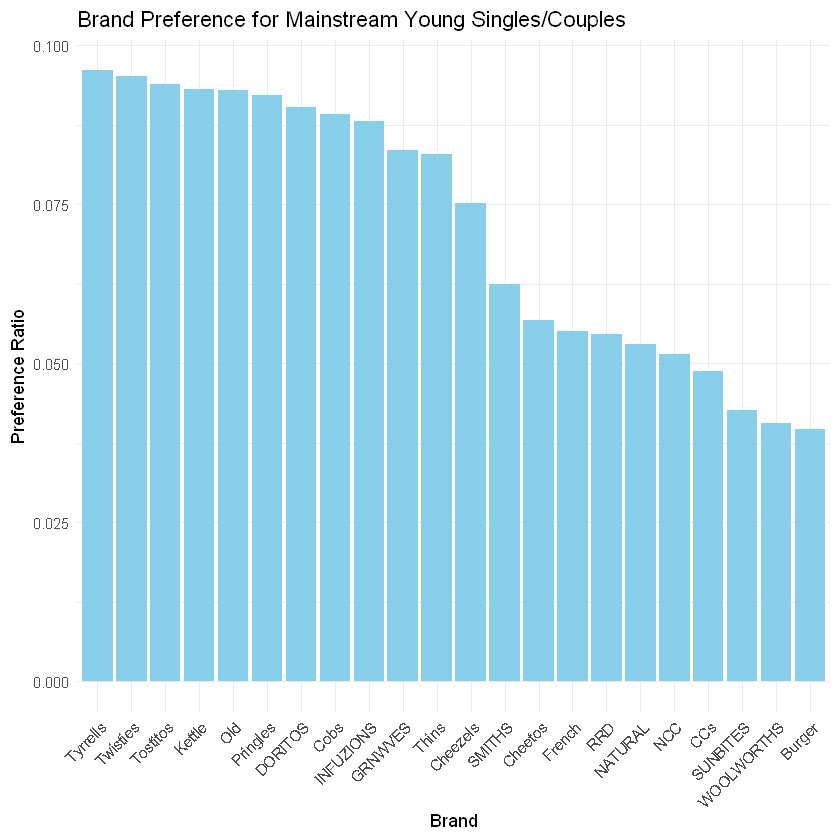

In [56]:
library(dplyr)

#Filter data for the target segment - Mainstream young singles/couples
mainstream_young <- dplyr::filter(merged_data, LIFESTAGE == "YOUNG SINGLES/COUPLES" & PREMIUM_CUSTOMER == "Mainstream")

#Calculate the total number of purchases by brand within this segment
brand_counts <- mainstream_young %>%
  group_by(BRAND) %>%
  summarise(Segment_Purchases = n()) %>%
  arrange(desc(Segment_Purchases))

#Calculate total purchases for each brand across all segments
total_brand_counts <- merged_data %>%
  group_by(BRAND) %>%
  summarise(Total_Purchases = n())

#Join the data to get purchase proportions for this segment vs. overall
brand_preference <- brand_counts %>%
  left_join(total_brand_counts, by = "BRAND") %>%
  mutate(Segment_Preference = Segment_Purchases / Total_Purchases) %>%
  arrange(desc(Segment_Preference))

#Visualize the top brands by preference for this segment
ggplot(brand_preference, aes(x = reorder(BRAND, -Segment_Preference), y = Segment_Preference)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Brand Preference for Mainstream Young Singles/Couples",
       x = "Brand",
       y = "Preference Ratio") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))




We can see that: <br>
• Mainstream young singles/couples are 23% more likely to purchase Tyrrells chips compared to the restofthepopulation <br>
• Mainstream youngsingles/couples are 56% less likely to purchase Burger Rings compared to the rest of the population


Let’s also find out if our target segment tends to buy larger packs of chips. 

PACK_SIZE,targetSegment,other,affinityToPack
<dbl>,<dbl>,<dbl>,<dbl>
270,0.029845724,0.023357314,1.2777892
330,0.057465314,0.046686760,1.2308696
380,0.030156347,0.024669233,1.2224274
134,0.111979706,0.093662914,1.1955608
110,0.099658314,0.083570565,1.1925050
210,0.027308967,0.023380894,1.1680035
135,0.013848623,0.012169555,1.1379728
250,0.013460344,0.011895166,1.1315809
170,0.075740319,0.075375355,1.0048420


Saving 7 x 7 in image


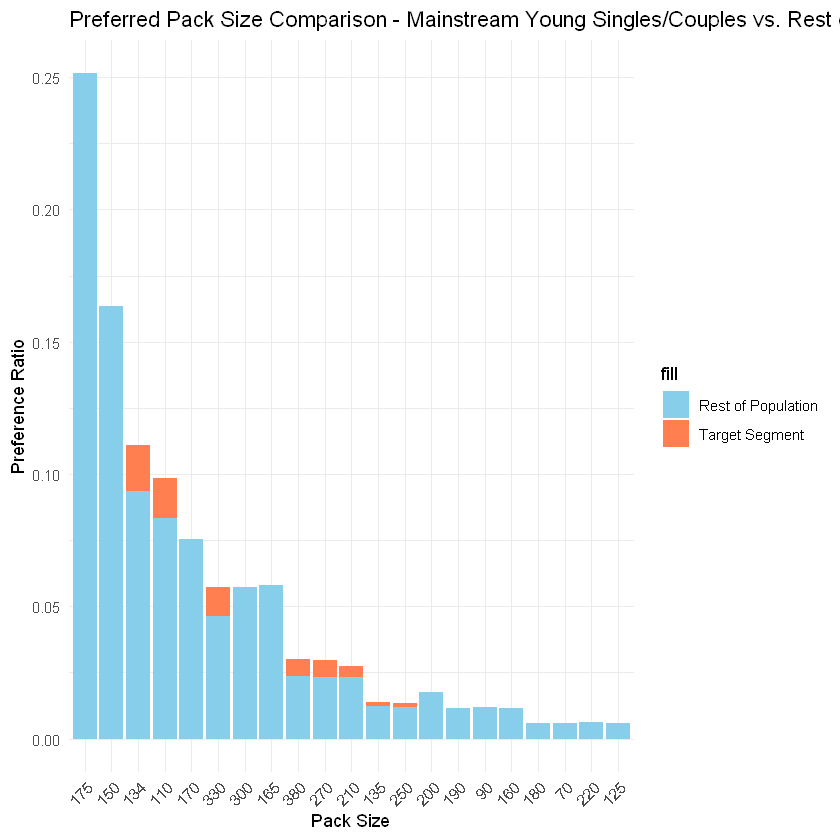

In [57]:
#Comparing mainstream - young singles/couples to the rest of the ppulation
#Filter data for the target segment - Mainstream young singles/couples

merged_data_filtered <- dplyr::filter(merged_data, LIFESTAGE == "YOUNG SINGLES/COUPLES" & PREMIUM_CUSTOMER == "Mainstream")
quantity_segment1_by_pack <- segment1[, .(targetSegment = 
            sum(PROD_QTY)/quantity_segment1), by = PACK_SIZE]
quantity_other_by_pack <- other[, .(other = sum(PROD_QTY)/quantity_other), by = PACK_SIZE]
pack_proportions <- merge(quantity_segment1_by_pack, quantity_other_by_pack)[, affinityToPack := targetSegment/other]
pack_proportions[order(-affinityToPack)]

#Calculate the pack size distribution for the target segment
pack_size_counts_target <- mainstream_young %>%
  group_by(PACK_SIZE) %>%
  summarise(Target_Segment_Count = n()) %>%
  arrange(desc(Target_Segment_Count))

#Calculate the pack size distribution for the rest of the population
pack_size_counts_rest <- merged_data %>%
  filter(!(LIFESTAGE == "YOUNG SINGLES/COUPLES" & PREMIUM_CUSTOMER == "Mainstream")) %>%
  group_by(PACK_SIZE) %>%
  summarise(Rest_Population_Count = n())

#Merge and calculate the preference for pack sizes within the target segment vs. the rest
pack_size_preference <- pack_size_counts_target %>%
  left_join(pack_size_counts_rest, by = "PACK_SIZE") %>%
  mutate(Target_Preference_Ratio = Target_Segment_Count / sum(Target_Segment_Count),
         Rest_Population_Ratio = Rest_Population_Count / sum(Rest_Population_Count)) %>%
  arrange(desc(Target_Preference_Ratio))

#Visualize the pack size preference comparison
ggplot(pack_size_preference, aes(x = reorder(PACK_SIZE, -Target_Preference_Ratio))) +
  geom_bar(aes(y = Target_Preference_Ratio, fill = "Target Segment"), stat = "identity", position = "dodge") +
  geom_bar(aes(y = Rest_Population_Ratio, fill = "Rest of Population"), stat = "identity", position = "dodge") +
  labs(title = "Preferred Pack Size Comparison - Mainstream Young Singles/Couples vs. Rest of Population",
       x = "Pack Size",
       y = "Preference Ratio") +
  scale_fill_manual(values = c("skyblue", "coral")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
ggsave("Preferred Pack Size Comparison - Mainstream Young Singles/Couples vs. Rest of Population.png")


It looks like Mainstream youngsingles/couples are 27% more likely to purchase a 270g pack of chips compared to the rest of the population

let’s dive into what brands sell this packsize.


In [58]:
merged_data[PACK_SIZE == 270, unique(PROD_NAME)]


[1] "Twisties Cheese     270g" "Twisties Chicken270g"

Twisties are the only brand offering 270g packs and so this may instead be reflecting a higher likelihood of purchasing Twisties

## Conclusion
Sales have mainly been due to Budget-older families, Mainstream-youngsingles/couples, and Mainstream - retirees shoppers. 
I found that the high spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers. 
Mainstream, midage and young singles and couples are also more likely to pay more per packet of chips. 

This is indicative of impulse buying behaviour. We’ve also found that Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips compared to the rest of the population.

## Recommendation
The Category Manager may want to increase the category’s performance by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments where young singles and couples frequent more often to increase visibilty and impulse behaviour. 